## Manipulacion de Datos

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución. También escribe una conclusión que resuma tus hallazgos y elecciones.

### Diccionario de datos
Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
- 'order_id': número de ID que identifica de manera única cada pedido.
- 'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
- 'order_number': el número de veces que este cliente ha hecho un pedido.
- 'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
- 'order_hour_of_day': hora del día en que se hizo el pedido.
- 'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.

products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
- 'product_id': número ID que identifica de manera única cada producto.
- 'product_name': nombre del producto.
- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
- 'department_id': número ID que identifica de manera única cada departamento de víveres.

order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
- 'order_id': número de ID que identifica de manera única cada pedido.
- 'product_id': número ID que identifica de manera única cada producto.
- 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
- 'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

aisles.csv
- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
- 'aisle': nombre del pasillo.

departments.csv
- 'department_id': número ID que identifica de manera única cada departamento de víveres.
- 'department': nombre del departamento.

### Desarrollo

In [1]:
#Librerias
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import missingno as msno
import seaborn as sns

In [2]:
# Leer conjuntos de datos en los DataFrames
raw_orders = pd.read_csv('../data/instacart_orders.csv', sep=';')
raw_products = pd.read_csv('../data/products.csv',sep=';')
raw_aisles = pd.read_csv('../data/aisles.csv',sep=';')
raw_departments = pd.read_csv('../data/departments.csv',sep=';')
raw_order_products = pd.read_csv('../data/order_products.csv',sep=';')

In [3]:
# mostrar información del DataFrame
raw_orders.info(show_counts=True) #considero importante mostrar la info de cada dataframe por toda la informacion que nos brinda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
raw_products.info(show_counts=True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
raw_aisles.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
raw_departments.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# mostrar información del DataFrame
raw_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Comentarios

1. Para el Dataframe df_orders tenemos unicamente en la columna 'days_since_prior_order' tiene valores NaN, las demas columnas parecen no tener problemas quiza valores duplicados y/o errores de texto, lo veremos mas adelante.
2. Para el Dataframe df_products tenemos que unicamente la columna 'product_name' tiene valores NaN, las demas columnas parecen no tener problemas, quiza valores duplicados y/o errores de texto, lo veremos mas adelante.
3. Para el Dataframe df_aisles no parece tener valores Nan, quiza tenga valores duplicados y/o errores de texto, lo veremos mas adelante.
4. Para el Dataframe df_departments no parece tener valores Nan, quiza tenga valores duplicados y/o errores de texto, lo veremos mas adelante.
5. Para el Dataframe df_order_products tenemos que unicamente la columna 'add_to_cart_order' tiene valores NaN, las demas columnas parecen no tener problemas, quiza valores duplicados y/o errores de texto, lo veremos mas adelante.
6. Todas las columnas que serviran de llave id para vincular los Dataframe tienen el mismo nombre y tipo de dato, ejemplo df_instacart -> 'order_id' (int64) con df_order_products -> 'order_id' (int64)

### Preprocesamiento de los datos

#### raw_orders

In [8]:
# Revisamos si hay pedidos duplicados
print('Total de Duplicados: ', raw_orders.duplicated().sum())  # Para saber exactamente cuantos valores duplicados hay

Total de Duplicados:  15


In [9]:
# Eliminamos los pedidos duplicados
raw_orders.drop_duplicates(inplace=True) # eliminamos duplicados con parametro inplace = True

<Figure size 500x400 with 0 Axes>

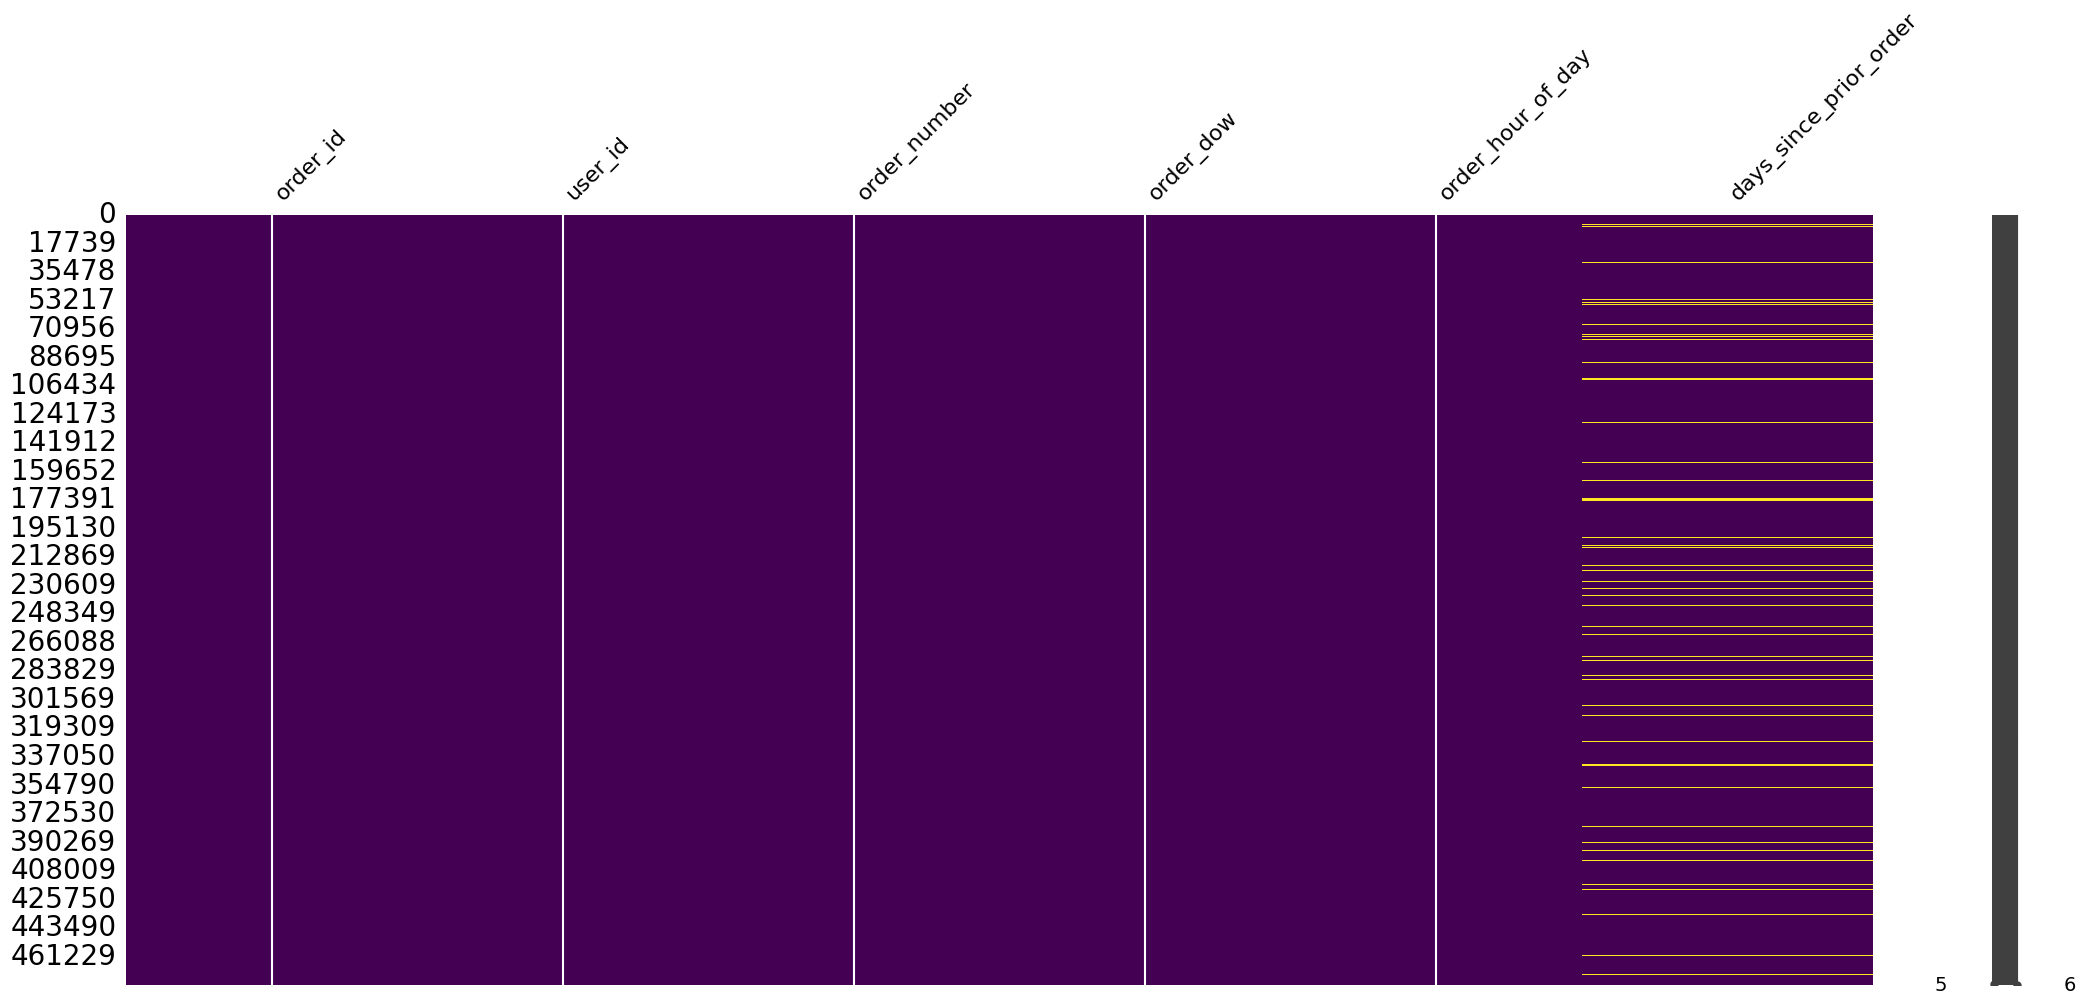

In [10]:
# Mostramos graficamente los valores faltantes.
plt.figure(figsize=(5, 4))
msno.matrix(raw_orders)
sns.heatmap(raw_orders.isna(), cbar=False, cmap="viridis")
plt.show()

In [11]:
# Verificar la cantidad de valores NaN porcentual en la columna 'days_since_prior_order'
raw_orders.isna().mean() * 100

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.016678
dtype: float64

In [12]:
# Rellenamos los valores de 'days_since_prior_order' con cero
raw_orders['days_since_prior_order'] = raw_orders['days_since_prior_order'].fillna(0)
df_orders = raw_orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


### Comentarios para df_orders
- Eliminamos duplicados
- Rellenamos con 0 los valores NaN, porque representan un porcentaje bajo un 6%.
- El valor cero significaria que aun no tenemos compras y en caso se hiciera una compra este valor quedaria en cero ya que no paso ningun dia en ese momento, para luego ir incrementandose.
- Tenemos el dataframe df_orders lista para seguir con el analisis.

#### raw_products

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Total de Duplicados: ', raw_products.duplicated().sum())

Total de Duplicados:  0


<Figure size 500x400 with 0 Axes>

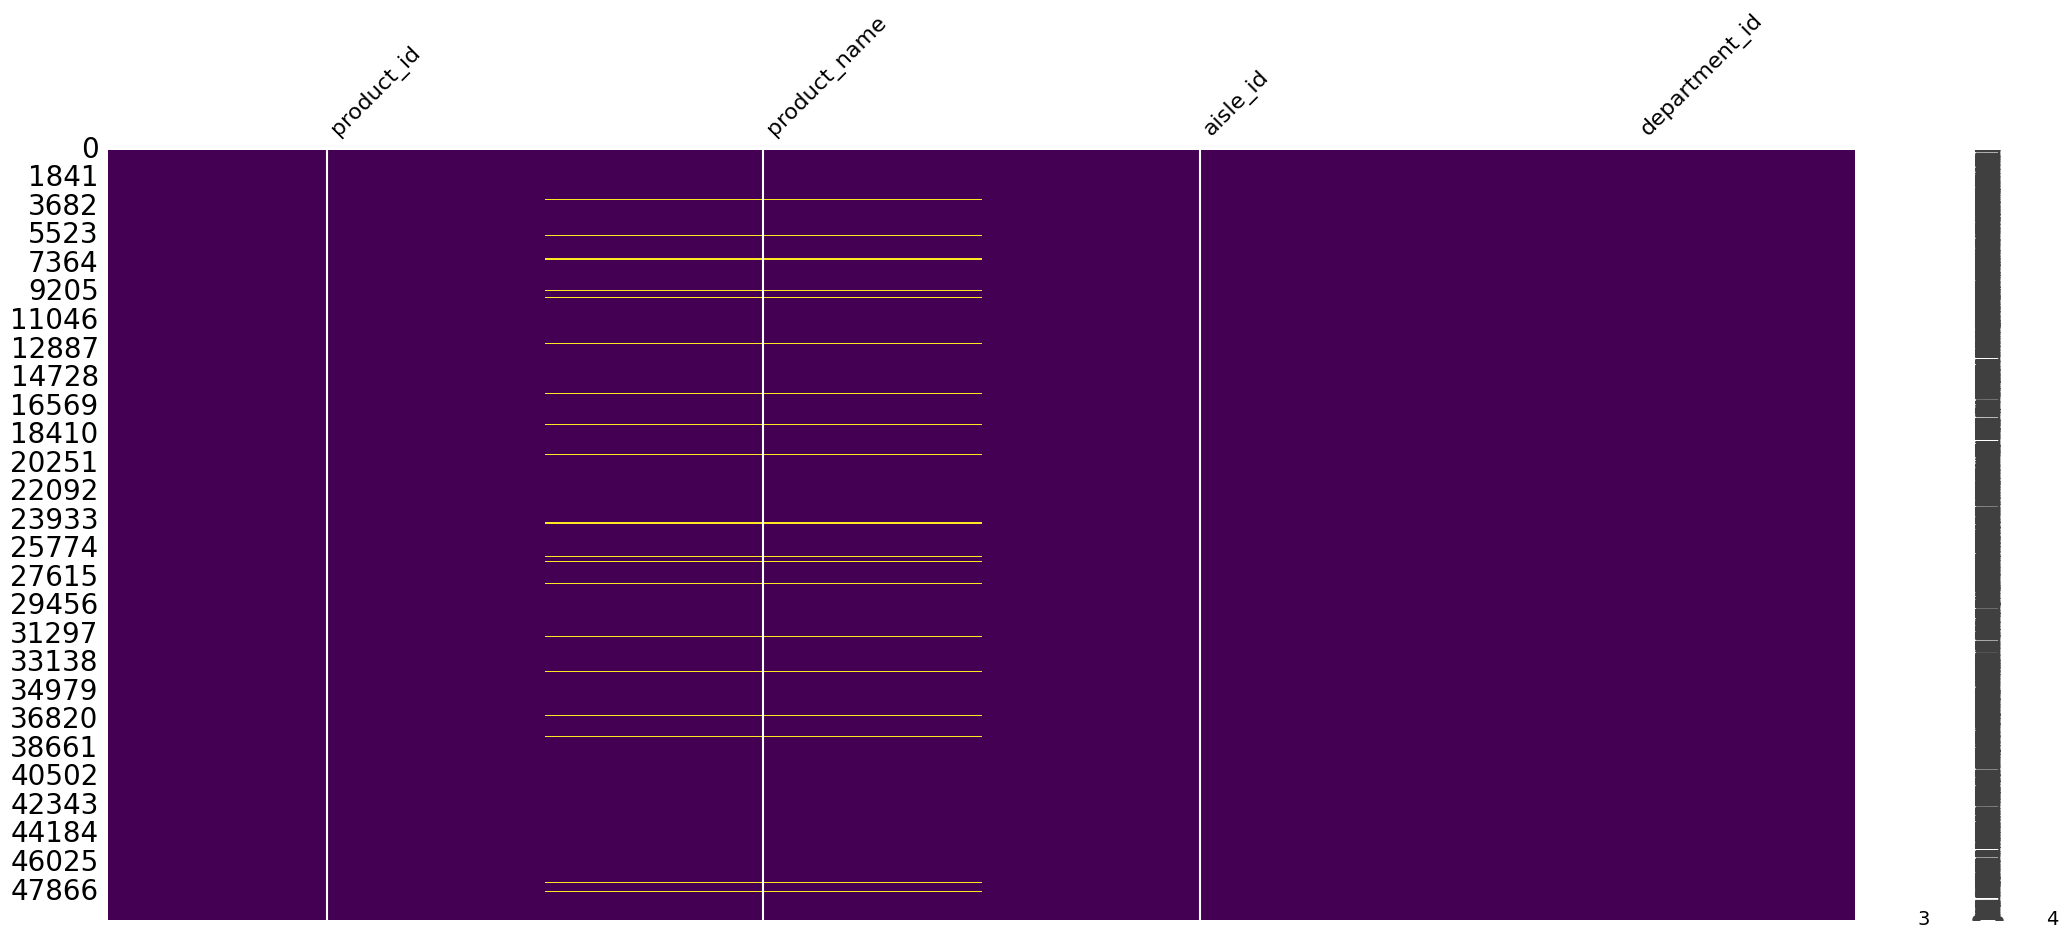

In [14]:
# Mostramos graficamente los valores faltantes.
plt.figure(figsize=(5, 4))
msno.matrix(raw_products)
sns.heatmap(raw_products.isna(), cbar=False, cmap="viridis")
plt.show()

In [15]:
# Verificar la cantidad de valores NaN porcentual en la columna 'days_since_prior_order'
raw_products.isna().mean() * 100

product_id       0.000000
product_name     2.531493
aisle_id         0.000000
department_id    0.000000
dtype: float64

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
raw_products[raw_products['product_name'].str.upper().duplicated(keep=False) & raw_products['product_name'].notna()].sort_values('product_name', ascending=False) 

,product_id,product_name,aisle_id,department_id
12820,12821,pumpkin spice,53,16
1826,1827,Yams Cut Sweet Potatoes in Syrup,81,15
38260,38261,Yams Cut Sweet Potatoes In Syrup,81,15
21366,21367,Wild Sardines in Spring Water,95,15
40093,40094,Wild Sardines In Spring Water,95,15
...,...,...,...,...
22582,22583,Albacore Solid White Tuna In Water,95,15
13152,13153,Aged Balsamic Vinegar of Modena,19,13
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11


In [17]:
# Filtrar productos duplicados basados en product_name (ignorando mayúsculas/minúsculas)
# y no nulos
filtered_products = raw_products[
    raw_products['product_name'].str.upper().duplicated(keep=False) &
    raw_products['product_name'].notna()
]

# Agrupar por product_name (ignorando mayúsculas/minúsculas) y obtener el menor product_id
unique_products = (
    filtered_products
    .groupby(raw_products['product_name'].str.upper())['product_id']
    .min()
    .reset_index()
    .rename(columns={'product_id': 'unique_product_id'})
)

# Si necesitas incluir otros valores junto con los IDs únicos:
result = raw_products.merge(
    unique_products,
    left_on=raw_products['product_name'].str.upper(),
    right_on='product_name',
    how='left'
)

result[result['product_name'].str.upper().duplicated(keep=False) & result['product_name'].notna()].sort_values('product_name', ascending=False)[['product_name','unique_product_id']]

,product_name,unique_product_id
38260,YAMS CUT SWEET POTATOES IN SYRUP,1827.0
1826,YAMS CUT SWEET POTATOES IN SYRUP,1827.0
21366,WILD SARDINES IN SPRING WATER,21367.0
40093,WILD SARDINES IN SPRING WATER,21367.0
49442,VITAMIN D3 5000 IU,46874.0
...,...,...
24830,ALBACORE SOLID WHITE TUNA IN WATER,22583.0
13152,AGED BALSAMIC VINEGAR OF MODENA,13153.0
19941,AGED BALSAMIC VINEGAR OF MODENA,13153.0
31844,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,23340.0


In [18]:
result = result.drop_duplicates(subset=['product_name']) # eliminamos los duplicados en product_name

In [19]:
# Realizar el merge por la izquierda entre raw_product y result
merged_products = raw_products.merge(
    result[['product_name', 'unique_product_id']],  # Seleccionar solo las columnas necesarias de 'result'
    on='product_name',  # Realizar el merge basado en 'product_name'
    how='left'  # Merge por la izquierda
)

# Realizar el merge con el dataframe limpio
merged_products = raw_products.merge(
    result[['product_name', 'unique_product_id']],
    on='product_name',
    how='left'
)

# Reemplazar los valores de 'product_id'
merged_products['product_id'] = merged_products['unique_product_id'].combine_first(merged_products['product_id'])

# Eliminar la columna 'unique_product_id'
raw_products = merged_products.drop(columns=['unique_product_id'])

raw_products

,product_id,product_name,aisle_id,department_id
0,1.0,Chocolate Sandwich Cookies,61,19
1,2.0,All-Seasons Salt,104,13
2,3.0,Robust Golden Unsweetened Oolong Tea,94,7
3,4.0,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5.0,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,22541.0,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,25893.0,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,32861.0,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,36790.0,SPRING WATER BODY WASH,127,11


In [20]:
# Verificar la cantidad de valores NaN porcentual en la columna 'days_since_prior_order'
raw_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [21]:
#En que pasillo se encuentran todos los NaN
raw_products.groupby('aisle_id')['product_name'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head()

aisle_id
100    1258
85        0
99        0
98        0
97        0
Name: product_name, dtype: int64

In [22]:
#En que departamento se encuentran todos los NaN
raw_products.groupby('department_id')['product_name'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head()

department_id
21    1258
12       0
20       0
19       0
18       0
Name: product_name, dtype: int64

<Figure size 800x600 with 0 Axes>

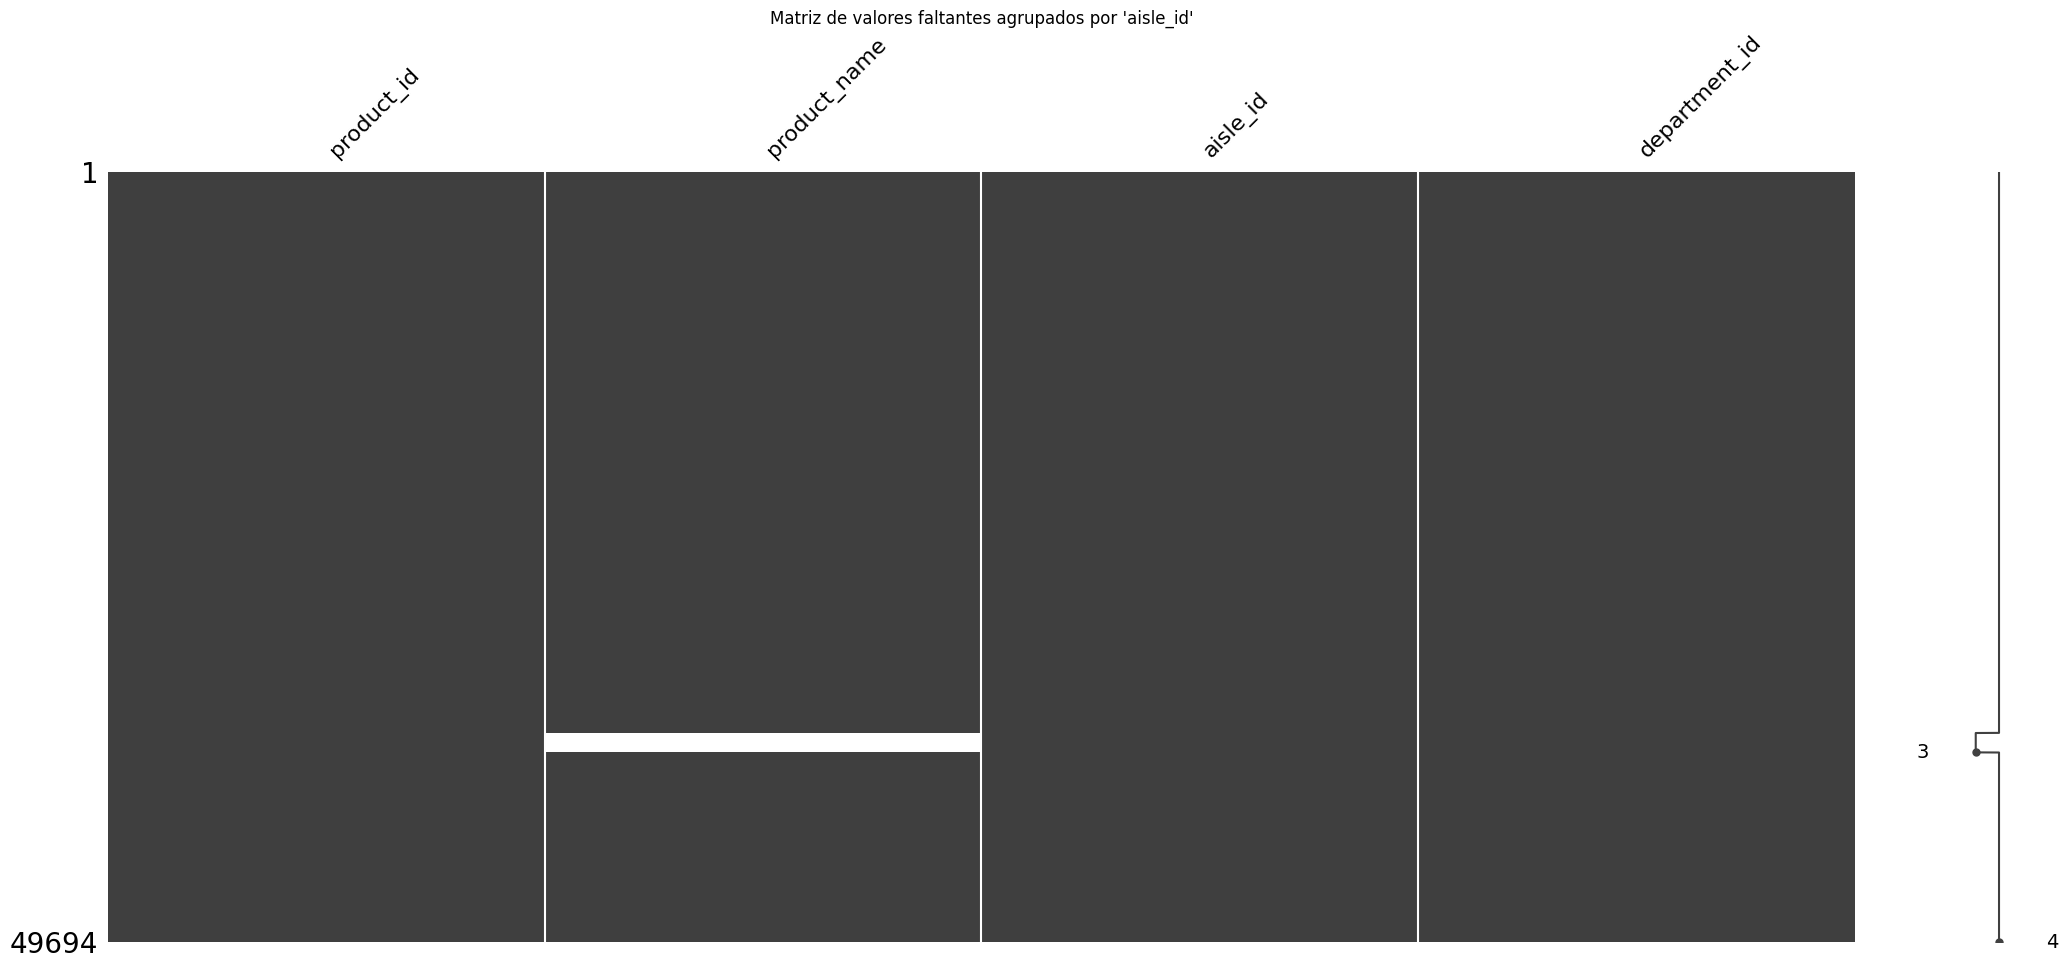

In [23]:
# Mostramos graficamente los valores faltantes.
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico
msno.matrix(raw_products.sort_values('aisle_id'))  # Ordena por 'aisle_id' para claridad
plt.title("Matriz de valores faltantes agrupados por 'aisle_id'")
plt.show()

In [24]:
raw_aisles[raw_aisles['aisle_id']==100]

,aisle_id,aisle
99,100,missing


In [25]:
raw_departments[raw_departments['department_id']==21]

,department_id,department
20,21,missing


In [26]:
raw_products['product_name'] = raw_products['product_name'].fillna('missing')
df_products = raw_products

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49694 non-null  float64
 1   product_name   49694 non-null  object 
 2   aisle_id       49694 non-null  int64  
 3   department_id  49694 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


### Comentarios para df_products
- Eliminamos duplicados
- Encontramos que existian varios codigos de 'product_id' para el mismo 'product_name', homologamos a un solo codigo de 'product_id' para cada 'product_name'
- Rellenamos con 'missing' los valores NaN, porque estos prouctos se encuentran en el departamento 21 y el pasillo 100 de productos perdidos.
- Tenemos el dataframe 'df_products' lista para seguir con el analisis.

#### raw_order_products

In [27]:
raw_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [ ]:
# Actualizamos el 'product_id' a los valores unicos por cada 'product_name' para 'raw_order_products'
merged= raw_order_products.merge(
    result[['product_id','unique_product_id']],
    on='product_id',
    how='left')

# Reemplazar los valores de 'product_id'
merged['product_id'] = merged['unique_product_id'].combine_first(merged['product_id'])

# Eliminar la columna 'unique_product_id'
raw_order_products = merged.drop(columns=['unique_product_id'])

raw_order_products


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440.0,17.0,0
1,567889,1560.0,1.0,1
2,2261212,26683.0,1.0,1
3,491251,8670.0,35.0,1
4,2571142,1940.0,5.0,1
...,...,...,...,...
4545002,577211,15290.0,12.0,1
4545003,1219554,21914.0,9.0,0
4545004,692640,47766.0,4.0,1
4545005,319435,691.0,8.0,1


In [29]:
# Realizar el merge por la izquierda entre raw_product y result
merged_products = raw_products.merge(
    result[['product_name', 'unique_product_id']],  # Seleccionar solo las columnas necesarias de 'result'
    on='product_name',  # Realizar el merge basado en 'product_name'
    how='left'  # Merge por la izquierda
)

# Realizar el merge con el dataframe limpio
merged_products = raw_products.merge(
    result[['product_name', 'unique_product_id']],
    on='product_name',
    how='left'
)

# Reemplazar los valores de 'product_id'
merged_products['product_id'] = merged_products['unique_product_id'].combine_first(merged_products['product_id'])

# Eliminar la columna 'unique_product_id'
raw_products = merged_products.drop(columns=['unique_product_id'])

raw_products

,product_id,product_name,aisle_id,department_id
0,1.0,Chocolate Sandwich Cookies,61,19
1,2.0,All-Seasons Salt,104,13
2,3.0,Robust Golden Unsweetened Oolong Tea,94,7
3,4.0,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5.0,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,22541.0,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,25893.0,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,32861.0,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,36790.0,SPRING WATER BODY WASH,127,11


In [30]:
df_products = raw_products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49694 non-null  float64
 1   product_name   49694 non-null  object 
 2   aisle_id       49694 non-null  int64  
 3   department_id  49694 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


### Comentarios para raw_products
- No tenemos duplicados
- No tenemos NaN
- Homogenizamos los 'product_id' que variaban con el mismo product_name

In [31]:
#Contuniamos con raw_order_products
raw_order_products.isnull().mean()*100

order_id             0.000000
product_id           0.000000
add_to_cart_order    0.018394
reordered            0.000000
dtype: float64

#### Continuamos raw_order_products

In [32]:
# Revisa si hay filas totalmente duplicadas
# Verifica si hay filas totalmente duplicadas
print('Total de Duplicados: ', raw_order_products.duplicated().sum())

Total de Duplicados:  0


<Figure size 500x400 with 0 Axes>

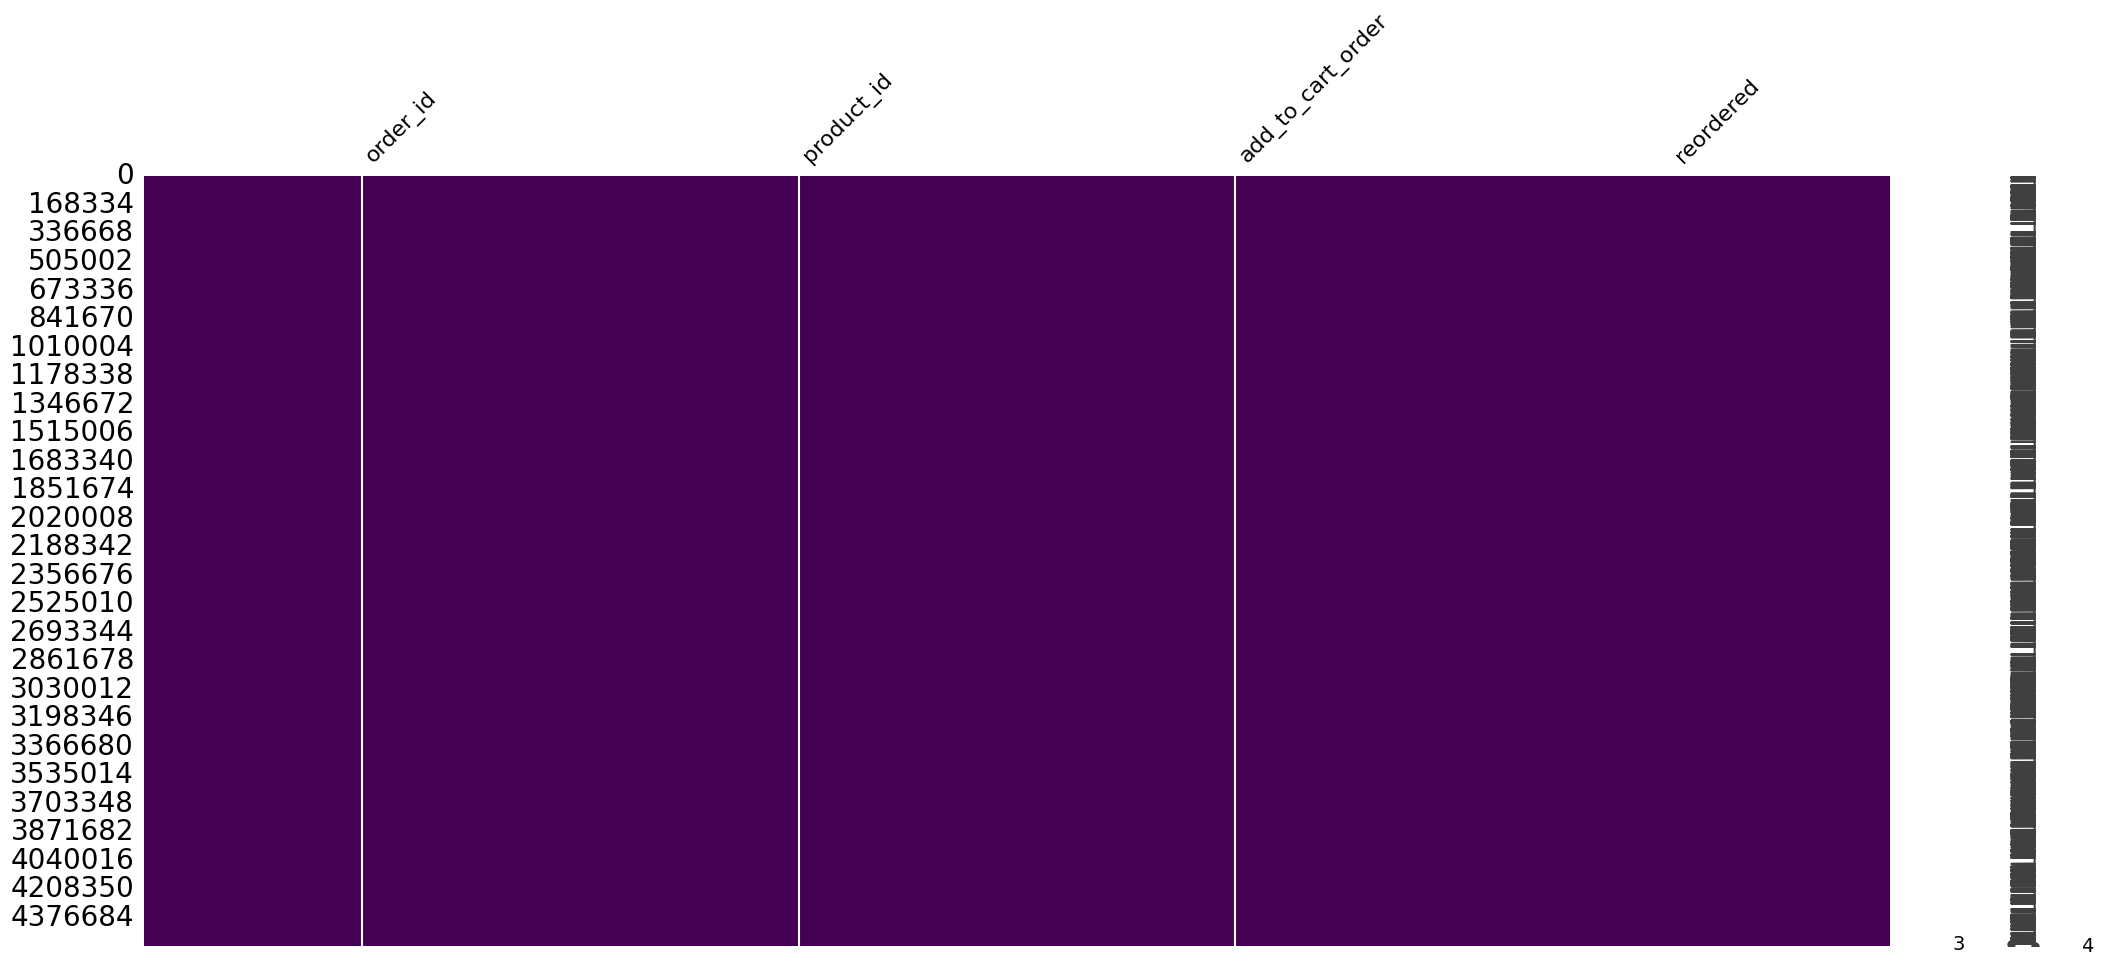

In [33]:
# Mostramos graficamente los valores faltantes.
plt.figure(figsize=(5, 4))
msno.matrix(raw_order_products)
sns.heatmap(raw_order_products.isna(), cbar=False, cmap="viridis")
plt.show()

In [34]:
# Verificar la cantidad de valores NaN porcentual en la columna 'days_since_prior_order'
raw_order_products.isna().mean() * 100

order_id             0.000000
product_id           0.000000
add_to_cart_order    0.018394
reordered            0.000000
dtype: float64

In [35]:
raw_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440.0,17.0,0
1,567889,1560.0,1.0,1
2,2261212,26683.0,1.0,1
3,491251,8670.0,35.0,1
4,2571142,1940.0,5.0,1
...,...,...,...,...
4545002,577211,15290.0,12.0,1
4545003,1219554,21914.0,9.0,0
4545004,692640,47766.0,4.0,1
4545005,319435,691.0,8.0,1


In [36]:
#Llenamos los valores NAN de add_to_cart con 999
raw_order_products['add_to_cart_order'] = raw_order_products['add_to_cart_order'].fillna(999)

raw_order_products['add_to_cart_order'] = raw_order_products['add_to_cart_order'].astype('int64')

df_order_products = raw_order_products

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  float64
 2   add_to_cart_order  4545007 non-null  int64  
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Comentarios para order_products
- No tenemos duplicados
- Los valores NaN los convertirmos en 999 un numero alto, ya que no tenemos certeza de que posicion tienen en add_to_cart_order

#### raw_aisles

In [37]:
raw_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [38]:
raw_aisles.duplicated().value_counts()

False    134
Name: count, dtype: int64

In [39]:
df_aisles = raw_aisles

### Comentarios para order_products
- No tenemos duplicados
- No tenemos NaN.
- Este dataframe no presento ningun inconveniente

#### raw_departments

In [40]:
raw_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
df_departments = raw_departments

### Comentarios para order_products
- No tenemos duplicados
- No tenemos NaN.
- Este dataframe no presento ningun inconveniente

### Resumen

In [50]:
df_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [51]:
df_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49694 non-null  float64
 1   product_name   49694 non-null  object 
 2   aisle_id       49694 non-null  int64  
 3   department_id  49694 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


In [52]:

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  float64
 2   add_to_cart_order  4545007 non-null  int64  
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [53]:
df_aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [54]:
df_departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
